# Decision Tree
Importing the modules required for application of the decision tree.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier     #to build a classification tree
from sklearn.tree import plot_tree             #to plot the classfication tree
from sklearn.model_selection import train_test_split               # to split data for trainig and testing
from sklearn.model_selection import cross_val_score        # for cross validation
from sklearn.metrics import confusion_matrix          # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix           # to draw a confusion matrix

# Import the data
The data taken is Heart disease dataset from UCI Machine Learning Repository. This dataset will allow us to predict if someone has heart disease on their sex, age, blood pressure and a variety of other metrics.

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Missing Data
1. Identifying missing data

In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
# we see that data in ca and thal is object type so we check tha unique values in both the columns

df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

Both have some missing values in the form of '?' which needs to be dealth with as scikit learn doesnt deal with dataset having missing values.



# 2 Dealing with missing data.

In [10]:
# counting the number of missing rows in bith datasets
len(df.loc[(df['ca'] == '?')|(df['thal'] == '?')])

6

In [11]:
# printing the rows that missing values
df.loc[(df['ca'] == '?')|(df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


since the total rows are 303 and the rows with missing values are only 6 hence for this dataset we can remove these rows with missing values as it is only 2% of the rows. but normally we try to use impute in the case data is havng strong correlation and has too many missing values.

In [14]:
df_modified  = df.loc[(df['ca'] != '?')&(df['thal'] != '?')]
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [15]:
df_modified['ca'].unique()


array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [16]:
df_modified['thal'].unique()


array(['6.0', '3.0', '7.0'], dtype=object)

we have got rid of the missing values now and now we are ready to move forward

# Format Data
1. Split data into dependent and independent variables.

In [17]:
x = df_modified.iloc[:,:-1]    # or df_modified.drop('hd', axis = 1).copy() can also be used
x.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [22]:
y = df_modified.iloc[:,-1]


In [23]:
y.head()



0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# Format Data
3. One-Hot Encoding (Important)

In [24]:
pd.get_dummies(x, columns = ['cp']).head()


,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [25]:
x_modified  = pd.get_dummies(x, columns = ['cp', 'restecg', 'slope', 'thal'])


one hot coding is used for column having more than 2 categories and we do not have to do anything for data columns having only 2 categories

Now lets check what do we have in "y" column

In [26]:
y.unique()


array([0, 2, 1, 3, 4], dtype=int64)

In [27]:
y_not_zero = y>0
y_not_zero


0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: hd, Length: 297, dtype: bool

In [28]:
y[y_not_zero] = 1
y.unique()

<ipython-input-28-75767780bd02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero] = 1


array([0, 1], dtype=int64)

we are done with formating data now and lets move to using the classification tree.

# Build the preliminary Classification Tree

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_modified,y,test_size = 0.25, random_state = 42)


In [30]:
# create a decision tree and fit it into the training data
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(x_train, y_train)

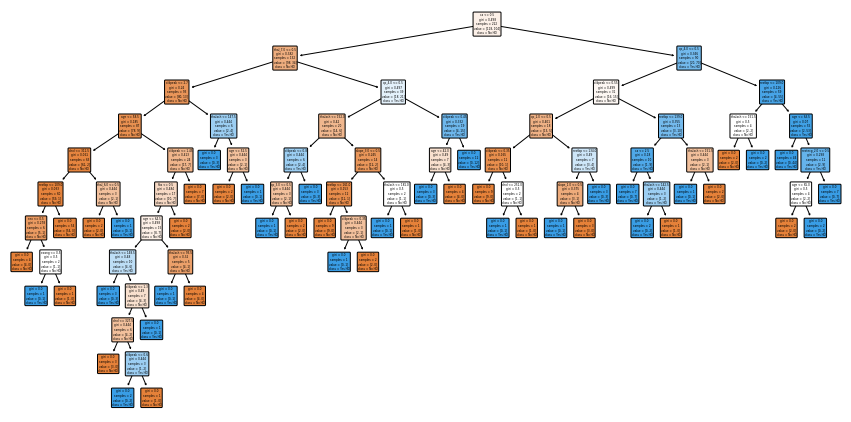

In [31]:
# we can plot th tree and it is huge!

plt.figure(figsize = (15,7.5))
plot_tree(clf_dt, filled = True, 
          rounded = True, class_names = ["No HD", "Yes HD"], 
          feature_names = x_modified.columns);

So, we have build the preliminary dataset and now we have to look how it runs with our test data and also draw a confusion matrix

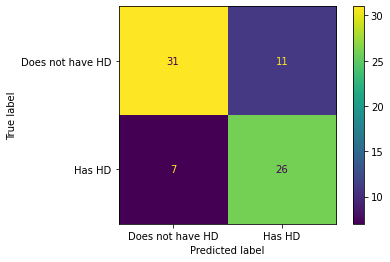

In [32]:
plot_confusion_matrix(clf_dt, x_test, y_test, display_labels = ["Does not have HD", "Has HD"])


# Cost complexity pruning

# 1. visualize alpha

In [33]:
path = clf_dt.cost_complexity_pruning_path(x_train, y_train)    # determine values for alpha
ccp_alphas  = path.ccp_alphas  #extract different values for alpha

ccp_alphas = ccp_alphas[:-1] # removing the largest value of alpha

In [34]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(x_train, y_train)
    clf_dts.append(clf_dt) 

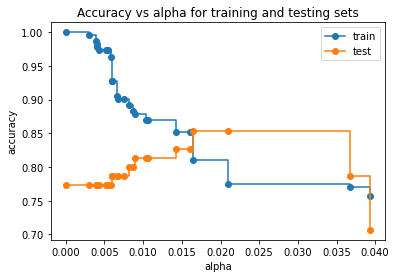

In [35]:
train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clf_dts]


fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label  = 'train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label  = 'test', drawstyle='steps-post')
ax.legend()
plt.show()

# cost complexity part 2
Cross validation

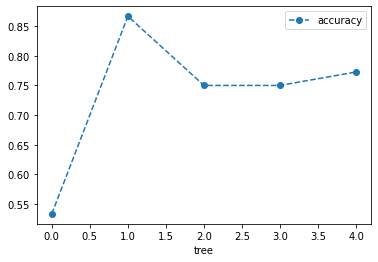

In [36]:
clf_dt  = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)  # create the tree with alpha = 0.016

# now use 5 fold cross validation creATE 5 DIFFErent traininf and testing daatset
# we use 5 fold because we dont have tons of data...

scores = cross_val_score(clf_dt, x_train, y_train, cv = 5)

df1 = pd.DataFrame(data={'tree':range(5), 'accuracy':scores})


df1.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle='--');

<AxesSubplot:xlabel='alpha'>

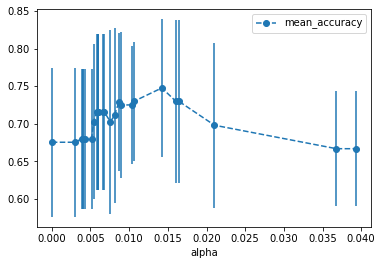

In [37]:
# create an array to store results of each fold during cross validation
alpha_loop_values = []

# for each candidate value of apha , we will run 5-fold cross validation
# Then we will store the mean and standard deviation of the scores for each call
# to cross_val_score in alpha_loop_values..

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
    
# now we can draw a graph of means and standard deviations of the scores
# for each candidate value for alpha

alpha_results = pd.DataFrame(alpha_loop_values,
                             columns = ['alpha', 'mean_accuracy', 'std'])


alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker = 'o',
                   linestyle='--')

So, we see the accuracy is better fir values near 0.014 instead of 0.016. we change the value of alpha. so we find the alpha in the range of 0.014 to 0.015

In [38]:
alpha_results[(alpha_results['alpha']>0.014) 
              &
              (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


We get alpha value as 0.014225.

In [39]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) 
              &
              (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [40]:
# converting alpha from series to float

ideal_ccp_alpha =float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

# Building, Evaluating, Drawing and Interpreting the The Final classification Tree

In [41]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)

clf_dt_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

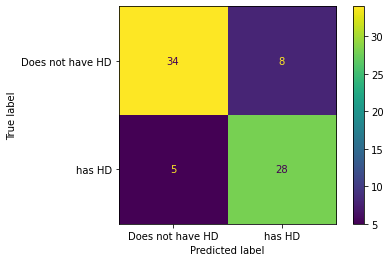

In [42]:
plot_confusion_matrix(clf_dt_pruned,
                      x_test,
                      y_test,
                      display_labels = ['Does not have HD', 'has HD'])


Accuracy has increased for detection of decision tree now lets get the final plot of decision tree (pruned)

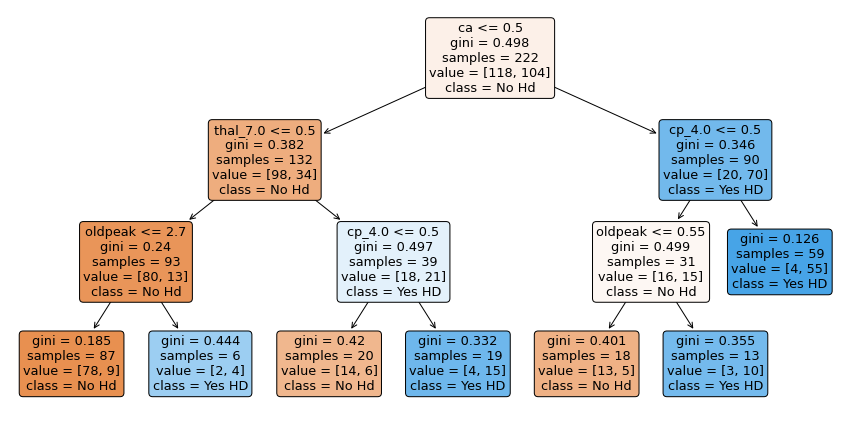

In [44]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, 
          filled = True,
          rounded = True,
          class_names =['No Hd', 'Yes HD'],
          feature_names = x_modified.columns);

# In conclusion we performed these tasks

Imported data.
Identified and Dealt with missing data.
Formatted the data for decision tree using one-hot coding.
Built a Preliminary Decision tree for classification.
Pruned the Decision Tree with cost complexity pruning.
Built, Draw, Interpreted and Evaluated the final decision tree.